In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_height,img_width=32,32
batchSize=20
train_dataset=tf.keras.utils.image_dataset_from_directory("fruits/fruits/train",image_size=(img_height,img_width), batch_size=batchSize)
test_dataset=tf.keras.utils.image_dataset_from_directory("fruits/fruits/test",image_size=(img_height,img_width), batch_size=batchSize)
validation_dataset=tf.keras.utils.image_dataset_from_directory("fruits/fruits/validation",image_size=(img_height,img_width), batch_size=batchSize)


Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


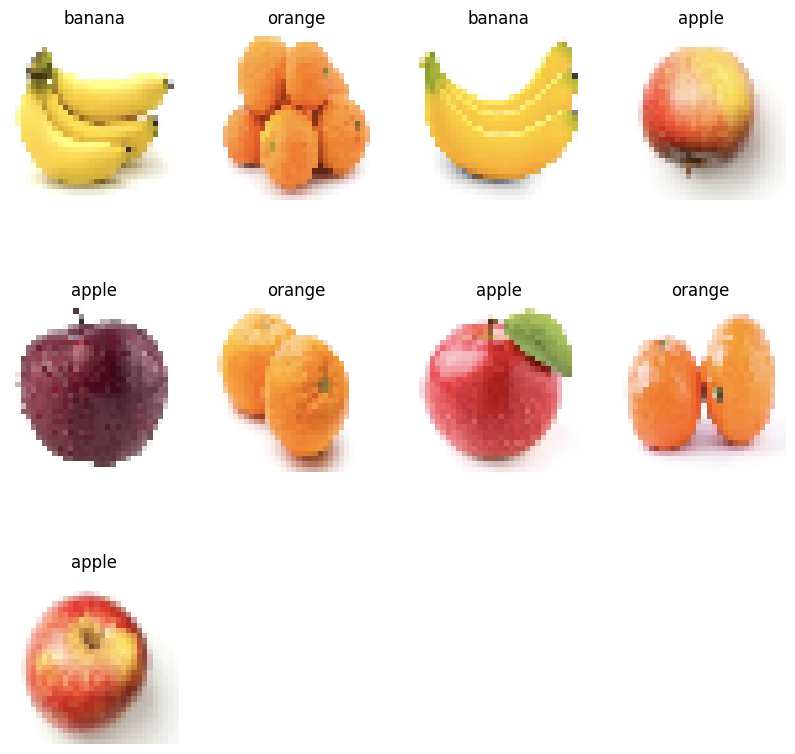

In [3]:
class_names=['apple','banana','orange']
plt.figure(figsize=(10,10))
for img,label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")
    plt.show()

In [5]:
modelCNN=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),#Normalisation, le modele va prendre que les images dans ce cas la, on ne peut pas faire la normalisation comme etape seule car on a les labels et images
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),


        tf.keras.layers.Conv2D(32, 3, activation='relu'), #32 filtre comme celle de l'image et sa taille est 3
        tf.keras.layers.MaxPooling2D(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'), #couche caché
        tf.keras.layers.Dense(3,activation='softmax') #coucge sortie
    ]
)

In [6]:
modelCNN.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
#Fonction des pertes pour les calcul des erreurs
#Categorical ..... la sortie est sous forme vector
#Sparse Cate..... La sortie est sous forme de classe

In [7]:
modelCNN.fit(
    train_dataset,
    validation_data=validation_dataset,  # Remplacer validation_dataset par validation_data
    epochs=10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - accuracy: 0.5698 - loss: 1.0442 - val_accuracy: 0.7121 - val_loss: 0.8144
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.7513 - loss: 0.6992 - val_accuracy: 0.8333 - val_loss: 0.4513
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.8437 - loss: 0.4104 - val_accuracy: 0.7424 - val_loss: 0.5045
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.9070 - loss: 0.2520 - val_accuracy: 0.9091 - val_loss: 0.2170
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9146 - loss: 0.2341 - val_accuracy: 0.7879 - val_loss: 0.5121
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9169 - loss: 0.2230 - val_accuracy: 0.9545 - val_loss: 0.1351
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9666 - loss: 0.1269 - val_accuracy: 0.9394 - val_loss: 0.1495
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9790 - loss: 0.0886 - val_accuracy: 0.

In [8]:
modelCNN.evaluate(test_dataset, verbose=2)

7/7 - 1s - 138ms/step - accuracy: 0.9692 - loss: 0.1254


[0.12535414099693298, 0.9692307710647583]